In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
mushroom_df = pd.read_csv('mushrooms.csv')

In [3]:
mushroom_df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
mushroom_df.shape

(8124, 23)

In [5]:
mushroom_df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
mushroom_df.groupby(['class', 'bruises']).count()

cap-shape  cap-surface  cap-color  odor  gill-attachment  \
class bruises                                                             
e     f             1456         1456       1456  1456             1456   
      t             2752         2752       2752  2752             2752   
p     f             3292         3292       3292  3292             3292   
      t              624          624        624   624              624   

               gill-spacing  gill-size  gill-color  stalk-shape  stalk-root  \
class bruises                                                                 
e     f                1456       1456        1456         1456        1456   
      t                2752       2752        2752         2752        2752   
p     f                3292       3292        3292         3292        3292   
      t                 624        624         624          624         624   

               ...  stalk-surface-below-ring  stalk-color-above-ring  \
class bruises  ...                                                     
e     f        ...                      1456                    1456   
      t        ...                      2752                    2752   
p     f        ...                      3292                    3292   
      t        ...                       624                     624   

               stalk-color-below-ring  veil-type  veil-color  ring-number  \
class bruises                                                               
e     f                          1456       1456        1456         1456   
      t                          2752       2752        2752         2752   
p     f                          3292       3292        3292         3292   
      t                           624        624         624          624   

               ring-type  spore-print-color  population  habitat  
class bruises                                                     
e     f             1456               1456        1456     1456  
      t             2752               2752        2752     2752  
p     f             3292               3292        3292     3292  
      t              624                624         624      624  

[4 rows x 21 columns]

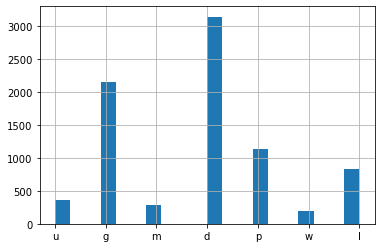

In [7]:
mushroom_df.habitat.hist(bins = 20)

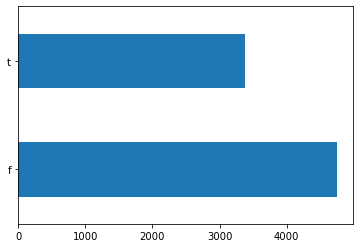

In [8]:
mushroom_df.bruises.value_counts().plot(kind='barh')

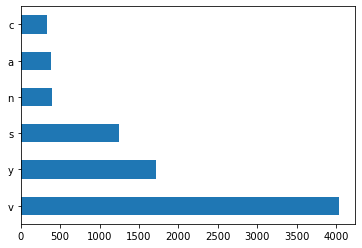

In [9]:
mushroom_df['population'].value_counts().plot(kind='barh')

In [10]:
labels = mushroom_df['class']
features = mushroom_df.drop(columns=['class'])

In [11]:
labels[0:5:1]

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [12]:
features[0:5:1]

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [13]:
features = pd.get_dummies(features)
features[0:5]

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [14]:
labels.replace('p', 0, inplace=True)
labels.replace('e', 1, inplace=True)

In [15]:
labels[0:5]

0    0
1    1
2    1
3    0
4    1
Name: class, dtype: int64

In [16]:
features = features.values.astype('float32')
labels = labels.values.astype('float32')
print(features[0:2])
print(labels[0:2])
print(len(features[0]))

[[0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[0. 1.]
117


In [167]:
features_train, features_test, labels_train, labels_test=train_test_split(features, labels,test_size=0.000009)
features_train, features_validation, labels_train, labels_validation = train_test_split(features_train, labels_train, test_size=0.00003)

In [168]:
model = keras.Sequential([keras.layers.Dense(32, input_shape=(117,)),
                          keras.layers.Dense(20, activation=tf.nn.relu),
                         keras.layers.Dense(2,activation='softmax')])

In [169]:
model.compile(optimizer='nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [170]:
history = model.fit(features_train, labels_train, epochs=10, validation_data=(features_validation, labels_validation))

Epoch 1/10
254/254 [==============================] - 0s 1ms/step - loss: 0.1349 - acc: 0.9516 - val_loss: 0.0029 - val_acc: 1.0000
Epoch 2/10
254/254 [==============================] - 0s 1ms/step - loss: 0.0051 - acc: 0.9996 - val_loss: 4.6481e-04 - val_acc: 1.0000
Epoch 3/10
254/254 [==============================] - 0s 1ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 2.0073e-04 - val_acc: 1.0000
Epoch 4/10
254/254 [==============================] - 0s 1ms/step - loss: 6.2515e-04 - acc: 1.0000 - val_loss: 1.1491e-04 - val_acc: 1.0000
Epoch 5/10
254/254 [==============================] - 0s 1ms/step - loss: 3.4635e-04 - acc: 1.0000 - val_loss: 5.8292e-05 - val_acc: 1.0000
Epoch 6/10
254/254 [==============================] - 0s 1ms/step - loss: 2.1510e-04 - acc: 1.0000 - val_loss: 3.7073e-05 - val_acc: 1.0000
Epoch 7/10
254/254 [==============================] - 0s 1ms/step - loss: 1.4416e-04 - acc: 1.0000 - val_loss: 2.5391e-05 - val_acc: 1.0000
Epoch 8/10
254/254 [================

In [171]:
prediction_features = model.predict(features_test)
performance = model.evaluate(features_test, labels_test)
print(performance)

1/1 [==============================] - 0s 0s/step - loss: 0.0000e+00 - acc: 1.0000
[0.0, 1.0]


In [172]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

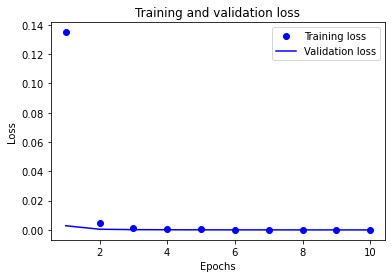

In [173]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()